In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
sns.set()

df = pd.read_csv('data_part_2.csv')

print(df.shape)
df.head()

(1009, 18)


,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code,final_price,time_of_day,sold
0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.0,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0,9999.0,night,1
1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782.0,2019-05-01,5,3,7,NaN,NaN,NaN,NaN,NaN,morning,0
2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251.0,2019-05-01,5,3,4,NaN,NaN,NaN,NaN,NaN,night,0
3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233.0,2019-05-01,5,3,18,NaN,NaN,NaN,NaN,NaN,evening,0
4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319.0,2019-05-02,5,4,14,NaN,NaN,NaN,NaN,NaN,day,0


# Set Proper Data Types

In [3]:
dtype_mapping = {
    'user_id': 'int64', 
    'region': 'object', 
    'device': 'object', 
    'channel': 'object', 
    'session_start': 'datetime64[ns]', 
    'session_end': 'datetime64[ns]', 
    'sessiondurationsec': 'float64', 
    'session_date': 'datetime64[ns]', 
    'month': 'int64', 
    'day': 'int64', 
    'hour_of_day': 'int64', 
    'order_dt': 'datetime64[ns]', 
    'revenue': 'float64', 
    'payment_type': 'object', 
    'promo_code': 'float64'
}

df = df.astype(dtype_mapping)

# 1. Data Preparation:

In [4]:
def prepare_session_purchase_data(df):
    """
    Prepares session duration and purchase amount data.
    Only considers sessions with purchases.
    """
    # Get sessions with purchases
    purchases = df[df['revenue'].notna()].copy()
    
    print("Summary statistics:")
    print("\nSession duration (seconds):")
    print(purchases['sessiondurationsec'].describe())
    print("\nPurchase amounts:")
    print(purchases['revenue'].describe())
    
    return purchases[['sessiondurationsec', 'revenue']]

session_data = prepare_session_purchase_data(df)

Summary statistics:

Session duration (seconds):
count      282.000000
mean      1966.365248
std       1990.513898
min          3.000000
25%        528.250000
50%       1224.000000
75%       2724.000000
max      10656.000000
Name: sessiondurationsec, dtype: float64

Purchase amounts:
count     282.000000
mean     5623.113475
std      1342.112888
min      4999.000000
25%      4999.000000
50%      4999.000000
75%      5999.000000
max      9999.000000
Name: revenue, dtype: float64


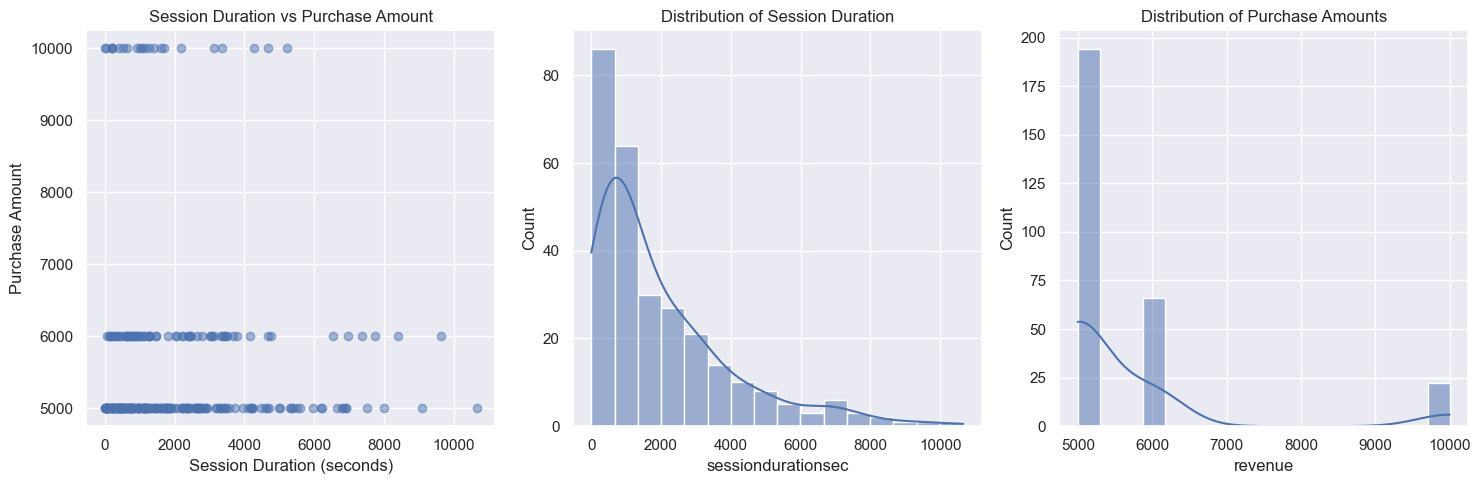

In [6]:
def visualize_relationship(data):
    """
    Creates scatter plot and distribution plots.
    """
    plt.figure(figsize=(15, 5))
    
    # Scatter plot
    plt.subplot(1, 3, 1)
    plt.scatter(data['sessiondurationsec'], data['revenue'], alpha=0.5)
    plt.xlabel('Session Duration (seconds)')
    plt.ylabel('Purchase Amount')
    plt.title('Session Duration vs Purchase Amount')
    
    # Distribution of session duration
    plt.subplot(1, 3, 2)
    sns.histplot(data['sessiondurationsec'], kde=True)
    plt.title('Distribution of Session Duration')
    
    # Distribution of purchase amounts
    plt.subplot(1, 3, 3)
    sns.histplot(data['revenue'], kde=True)
    plt.title('Distribution of Purchase Amounts')
    
    plt.tight_layout()
    plt.show()

visualize_relationship(session_data)

In [7]:
def test_correlation(data):
    """
    Tests correlation between session duration and purchase amount
    using both Pearson and Spearman correlations.
    """
    # Pearson correlation (linear relationship)
    pearson_corr, pearson_p = stats.pearsonr(
        data['sessiondurationsec'], 
        data['revenue']
    )
    
    # Spearman correlation (monotonic relationship)
    spearman_corr, spearman_p = stats.spearmanr(
        data['sessiondurationsec'], 
        data['revenue']
    )
    
    return {
        'pearson': {
            'correlation': pearson_corr,
            'p_value': pearson_p
        },
        'spearman': {
            'correlation': spearman_corr,
            'p_value': spearman_p
        }
    }

corr_results = test_correlation(session_data)
print("\nCorrelation results:")
print("Pearson correlation:", corr_results['pearson'])
print("Spearman correlation:", corr_results['spearman'])


Correlation results:
Pearson correlation: {'correlation': np.float64(-0.02762829671038386), 'p_value': np.float64(0.6440917584609547)}
Spearman correlation: {'correlation': np.float64(0.04766787603120908), 'p_value': np.float64(0.4252317273599361)}


## There is NO significant correlation between session duration and purchase amounts. This suggests that how long a customer spends on the site does not influence how much they spend, and vice versa.